Load Dataset and overview of the Dataset


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline

In [6]:
file_path = r'G:\Projects\CustomerChurnProject\customer_churn_prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

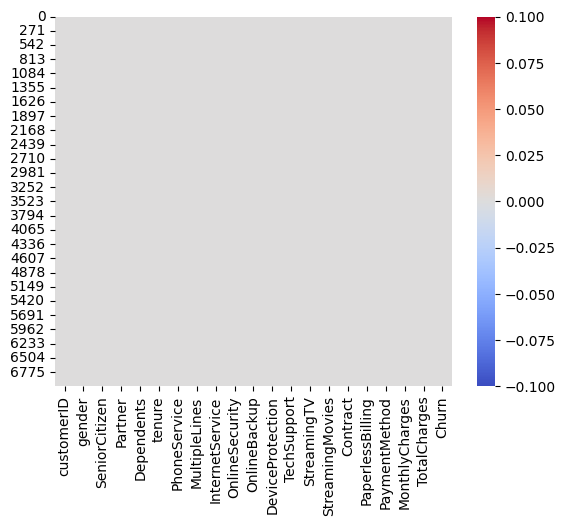

In [12]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [13]:
duplicate_count = df.duplicated().sum()
duplicate_count



np.int64(0)

In [14]:
df['InternetService'].value_counts()


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [15]:
df.drop(columns='customerID',inplace = True)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA and visualization 


C:\Users\Asus\AppData\Local\Temp\ipykernel_6268\3872492022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Churn',palette='coolwarm')


Text(0.5, 1.0, 'Churn Distribution')

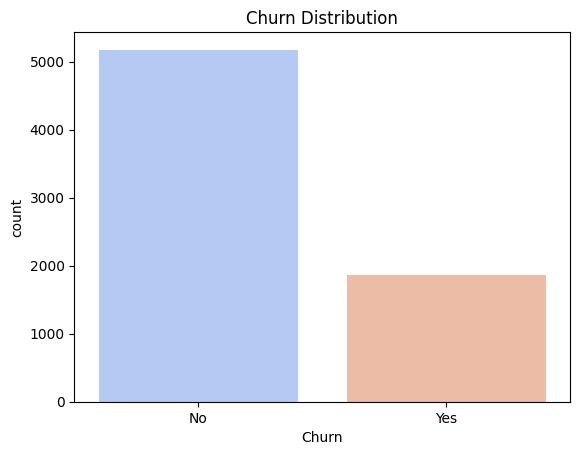

In [17]:
sns.countplot(data=df,x='Churn',palette='coolwarm')
plt.title('Churn Distribution')


In [18]:
churn_rate = df['Churn'].value_counts(normalize=True)*100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

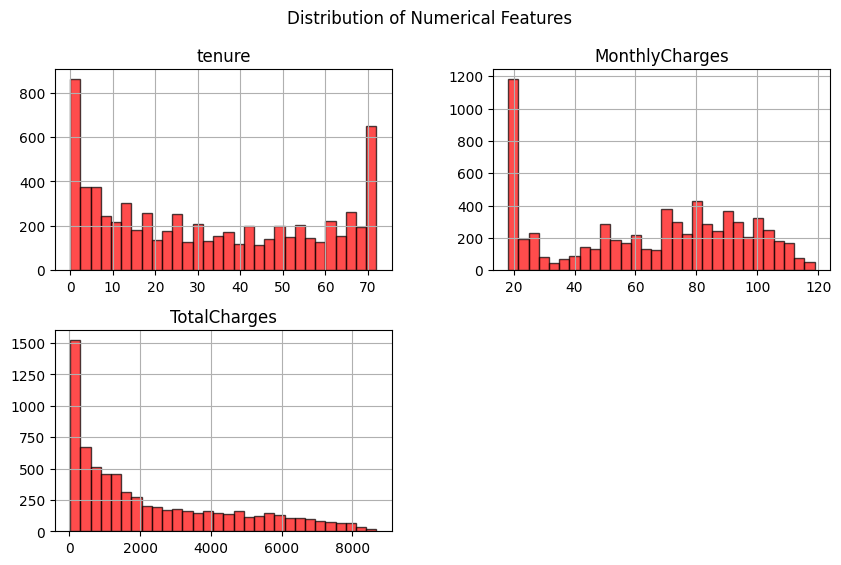

In [19]:
#convert totalChargers to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Visualize distributions
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].hist(bins=30, figsize=(10, 6), color='red', alpha=0.7, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [20]:
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

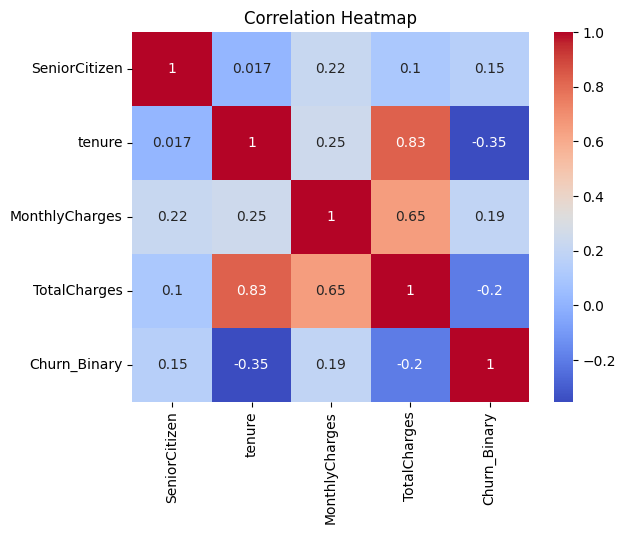

In [21]:


numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

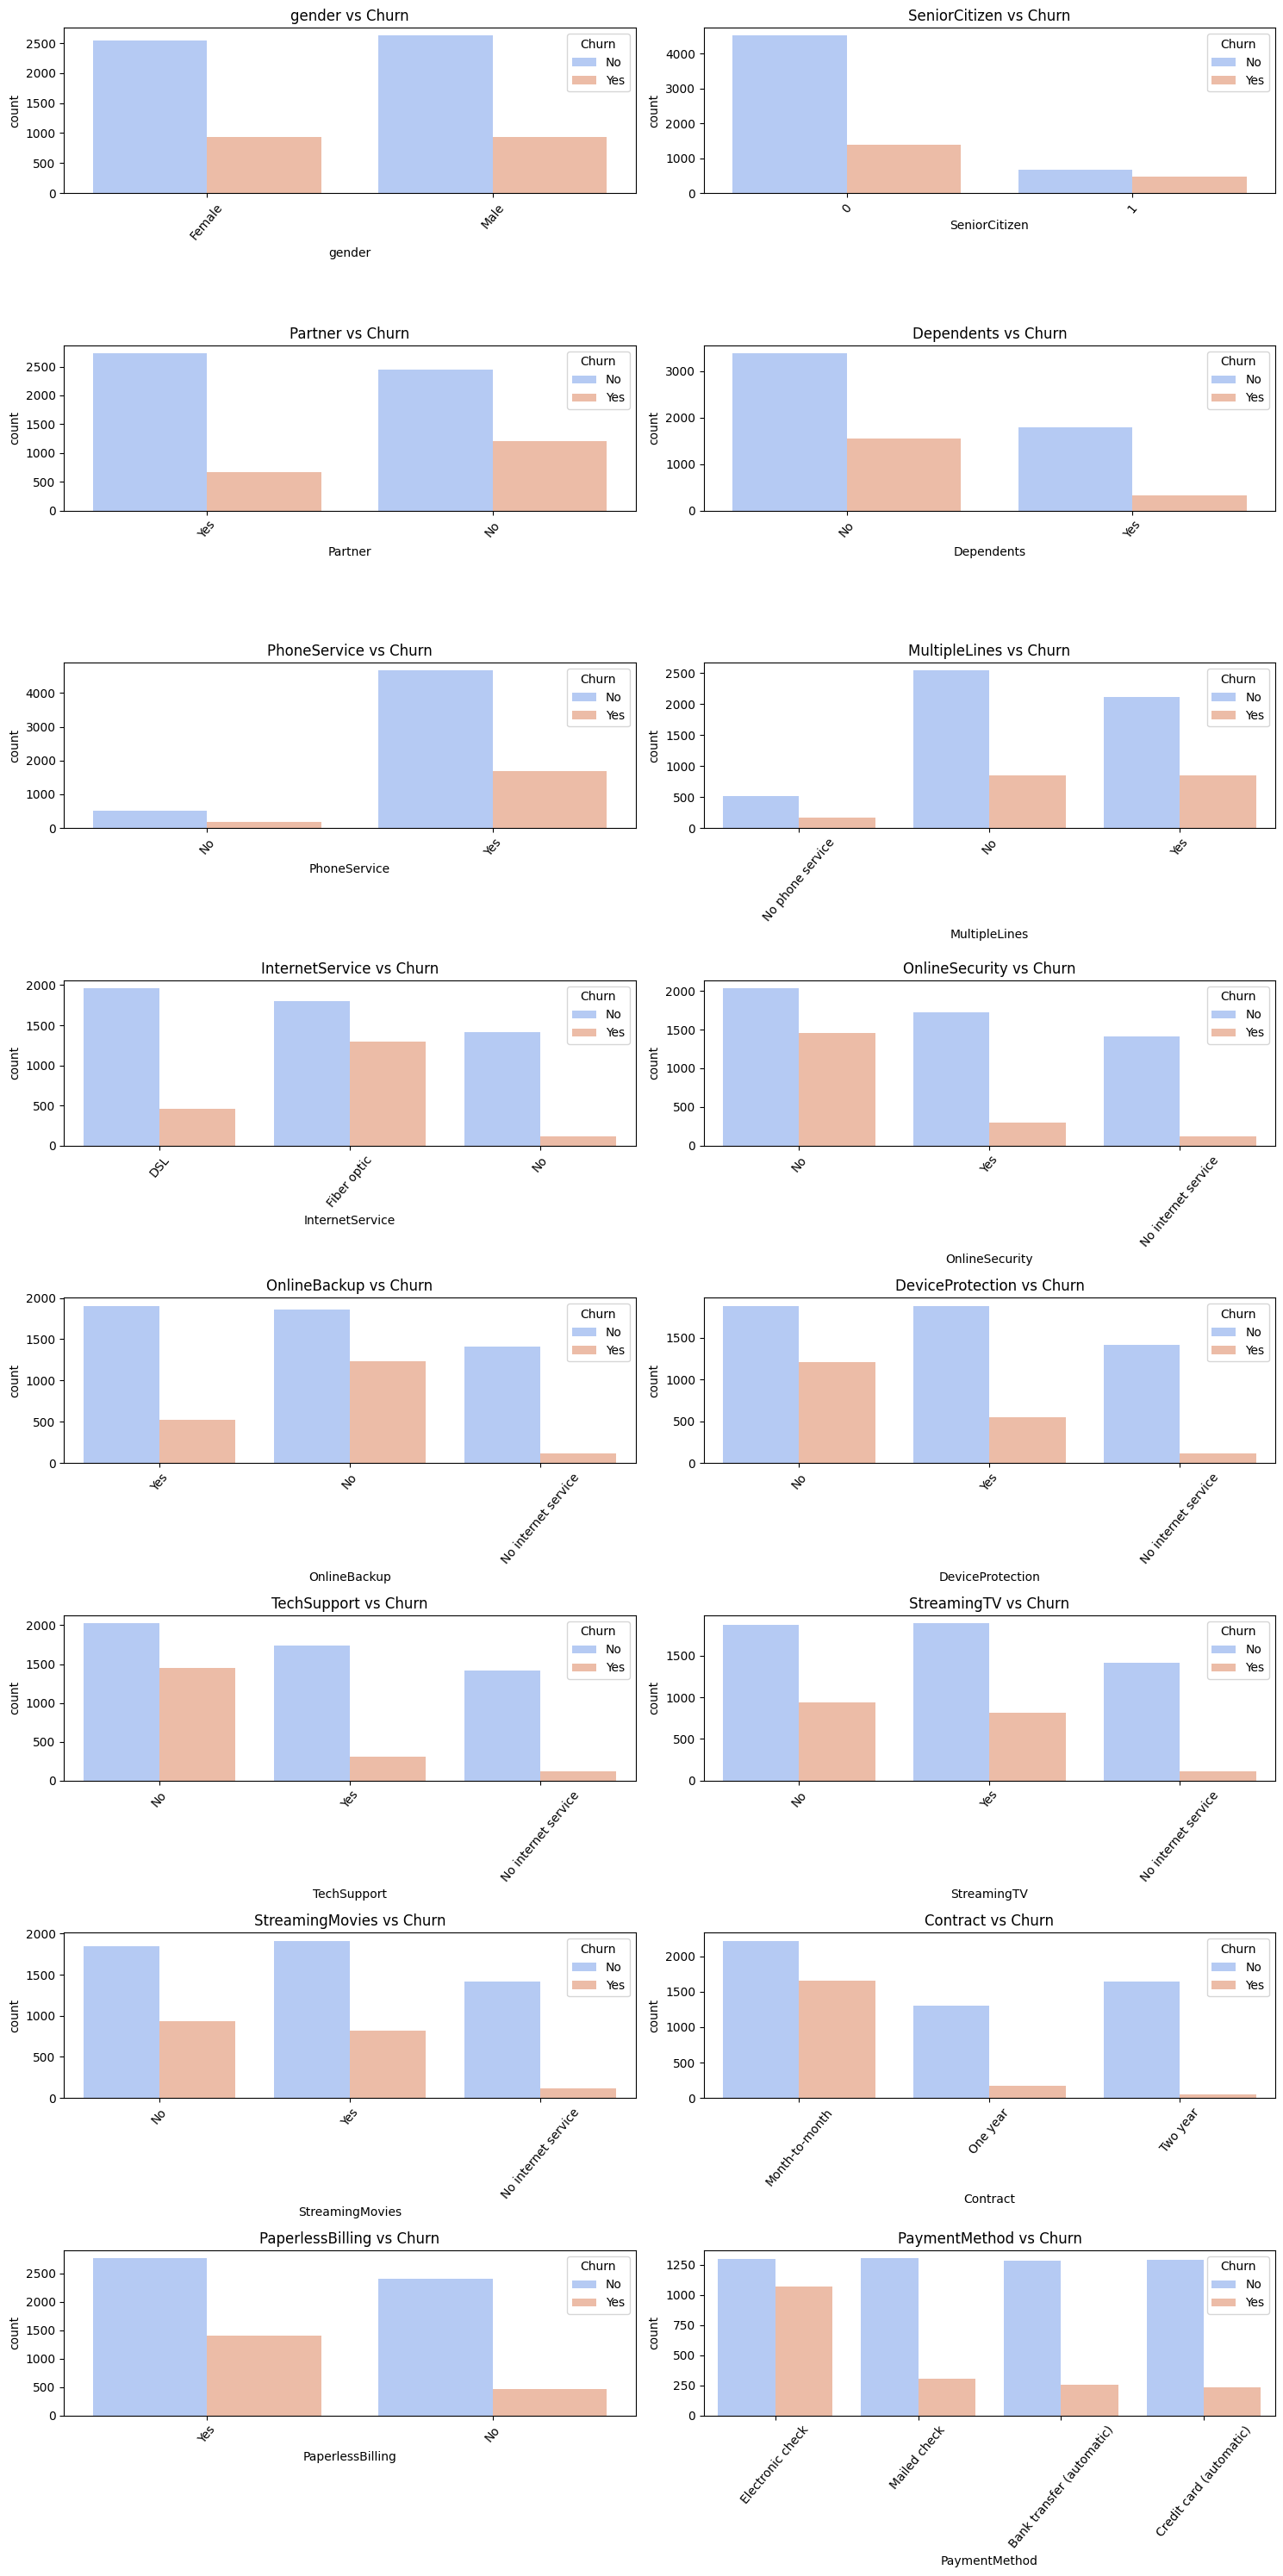

In [22]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(8, 2, figsize=(15, 30))  
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn', data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

    
    axes[i].set_xticks(range(len(axes[i].get_xticklabels())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=50)


for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
df[(df['PaymentMethod'] == 'Electronic check') & df['Churn_Binary'] == 1].value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract        PaperlessBilling  PaymentMethod     MonthlyCharges  TotalCharges  Churn  Churn_Binary
Male    0              No       No          1       Yes           No             DSL              No              No            No                No           No           No               Month-to-month  No                Electronic check  45.30           45.30         Yes    1               2
Female  1              No       No          1       Yes           No             Fiber optic      No              No            No                No           No           No               Month-to-month  Yes               Electronic check  69.60           69.60         Yes    1               2
Male    0              No       No          1       Yes           No             Fiber optic      No              No 

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binary
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


Feature Engineering 

In [25]:
print(df.isnull().sum())

# Handle missing TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Binary         0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_6268\4156874168.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [26]:
# Use One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Binary,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [27]:
df['HighChargeShortTenure'] = ((df['MonthlyCharges'] > df['MonthlyCharges'].mean()) & 
                                 (df['tenure'] < df['tenure'].mean())).astype(int)


In [28]:
df['ContractLength'] = df['Contract'].map({
    'Month-to-month': 1, 'One year': 12, 'Two year': 24})

In [29]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Binary,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [30]:
df_encoded.drop(columns='Churn',inplace = True)

Split the Data


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_encoded.drop(columns = ['Churn_Binary'])
y = df_encoded['Churn_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
X_test.shape

(1409, 30)

In [34]:
X_train.shape


(5634, 30)

In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [36]:
scale = StandardScaler()

In [37]:
X_train = scale.fit_transform(X_train)

In [38]:
X_test = scale.transform(X_test)

Model Tranning

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lgmodel = LogisticRegression()

In [41]:
lgmodel.fit(X_train,y_train)

LogisticRegression()

In [42]:
lgmodel.coef_

array([[-1.46407865, -0.35020133,  0.70579621,  0.00876444,  0.08908172,
        -0.00208105, -0.07849521, -0.07285823,  0.07285823,  0.13776475,
         0.52481673, -0.0613502 , -0.0613502 , -0.13348221, -0.0613502 ,
        -0.08236294, -0.0613502 ,  0.00465243, -0.0613502 , -0.14023537,
        -0.0613502 ,  0.17390429, -0.0613502 ,  0.1389693 , -0.24452863,
        -0.59107942,  0.20878636, -0.06541225,  0.13250574, -0.01269633]])

In [43]:
lgmodel.intercept_

array([-1.76398787])

In [44]:
lgmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
prediction = lgmodel.predict(X_test)

In [46]:
prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

Model Evaluation

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1026
           1       0.66      0.52      0.58       383

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



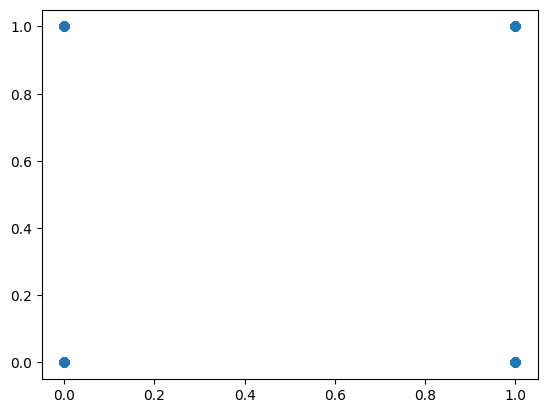

In [49]:
plt.scatter(y_test,prediction)

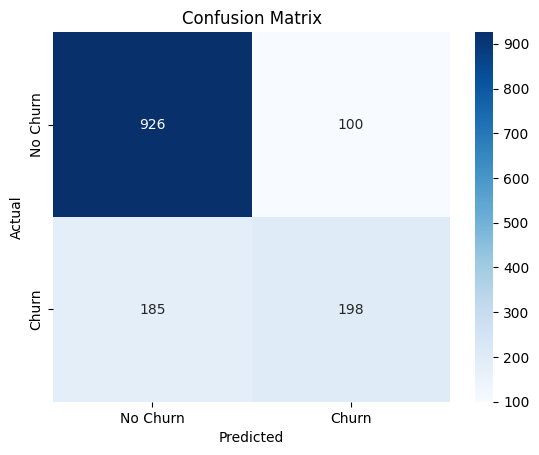

In [50]:
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hyperparameter Tunning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear'],       # Solver compatible with l1 and l2
    'class_weight': [None, 'balanced']  # Handle class imbalance
}


In [53]:
grid_Search = GridSearchCV(LogisticRegression(),param_grid = param_grid,cv=5,scoring='f1',verbose=2,n_jobs=1,refit=True)

In [54]:
grid_Search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [55]:
grid_Search.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [62]:
best_model = grid_Search.best_estimator_

best_model

LogisticRegression(C=100, class_weight='balanced', solver='liblinear')

In [57]:
grid_prediction = grid_Search.predict(X_test)

In [58]:
print("Classification Report After Hyperparameter Tuning:")
print(classification_report(y_test, grid_prediction))


Classification Report After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1026
           1       0.53      0.78      0.63       383

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



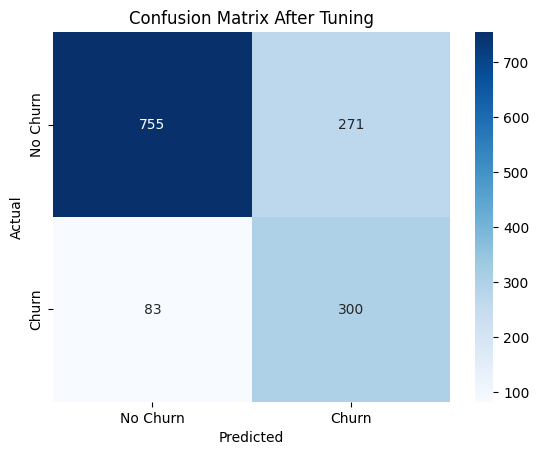

In [59]:
conf_matrix = confusion_matrix(y_test, grid_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After Tuning')
plt.show()

Save the Model

In [60]:
import joblib

In [63]:
joblib.dump(best_model, 'final_customer_churn_model.pkl')

['final_customer_churn_model.pkl']

Result Conclusion

Precision and Recall for Class 1 (Churn):

Precision: 0.52 – The model has a moderate rate of correctly predicting churned customers. This means a significant portion of predicted churns are false positives.
Recall: 0.78 – The model successfully identifies 78% of the actual churned customers, which is a good result, particularly since identifying churners is the key focus.

Precision and Recall for Class 0 (No Churn):

Precision: 0.90 – The model accurately predicts non-churn customers most of the time.
Recall: 0.74 – However, the model misses some non-churn customers, as indicated by the lower recall compared to precision.

Overall Accuracy: 75% – While the model is performing reasonably well, there is room for improvement, particularly in correctly predicting churned customers.

Confusion Matrix: The confusion matrix showed a relatively good identification of non-churn customers but highlighted that a significant number of churn customers were incorrectly predicted as non-churn (False Negatives).

Insights from the Model

Important Features:

Key features contributing to churn prediction include Contract, MonthlyCharges, and tenure. These features suggest that customers with short-term contracts or high monthly charges are more likely to churn.

The feature SeniorCitizen also played a role in predicting churn, which could guide targeted retention strategies for senior customers.

Business Impact:

he model can help the business prioritize at-risk customers, particularly those with characteristics indicative of likely churn (e.g., high charges, short tenure, lack of a long-term contract).

Targeted retention strategies such as personalized offers, discounts, or improved customer support can be applied to customers predicted to churn, potentially reducing overall churn rates.

Conclusion

The Customer Churn Prediction model provides valuable insights into customer behavior and churn likelihood. While the model is performing well with an accuracy of 75% and a good recall for churn, future improvements are needed to address the imbalance in churn predictions and further fine-tune the model for better precision. With proper deployment and monitoring, the model has the potential to significantly contribute to customer retention strategies and reduce churn, ultimately improving the company’s bottom line.


